In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
import keras


Using TensorFlow backend.


## Get MNIST data from Keras

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## Small Data Exploration

60000
10000
(60000, 28, 28)
5


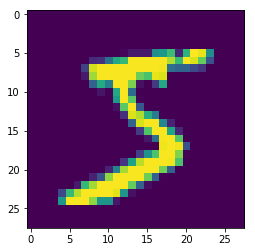

In [6]:
print(len(x_train))
print(len(x_test))
print(x_train.shape)
test_img =  x_train[0]
print(y_train[0])
plt.imshow(test_img)

## Standardize and Convert to 1-hot

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



(60000, 784)
60000 train samples
10000 test samples


## Convert Class labels to Binary Class matrices

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## It's model time!



In [10]:
model= Sequential()
model.add(Dense(28, activation="relu",input_shape=(784,)))
# model.add(Lambda(standardize,input_shape=(784,)))
# model.add(Flatten())
# model.add(Dense(28, activation="relu"))
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)




input shape  (None, 784)
output shape  (None, 10)


## Compile the Network

In [11]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

## Cross Validation

In [12]:
"""
from sklearn.model_selection import train_test_split
x = x_train
y = y_train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(x_train, y_train, batch_size=64)
val_batches = gen.flow(x_val, y_val, batch_size=64)
"""

'\nfrom sklearn.model_selection import train_test_split\nx = x_train\ny = y_train\nx_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)\nbatches = gen.flow(x_train, y_train, batch_size=64)\nval_batches = gen.flow(x_val, y_val, batch_size=64)\n'

In [13]:
history=model.fit(x_train, y_train,
                            batch_size = 128,
                            epochs=20, 
                            verbose=1,
                            validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.4839 - acc: 0.8704 - val_loss: 0.2741 - val_acc: 0.9232
Epoch 2/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2547 - acc: 0.9271 - val_loss: 0.2229 - val_acc: 0.9350
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.2133 - acc: 0.9391 - val_loss: 0.1997 - val_acc: 0.9414
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.1872 - acc: 0.9465 - val_loss: 0.1768 - val_acc: 0.9479
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1682 - acc: 0.9512 - val_loss: 0.1693 - val_acc: 0.9484
Epoch 6/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.1542 - acc: 0.9549 - val_loss: 0.1574 - val_acc: 0.9517
Epoch 7/20
60000/60000 [========

## Print out accuracy

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12631193027729168
Test accuracy: 0.9645


## Extract Weights from Model

In [21]:
for layer in model.layers:
  print("New Layer")
  weights = layer.get_weights()
  print(len(weights[0]))
  print(weights)
  

New Layer
28
[array([[ 0.00811724, -0.0660417 , -0.03121311, ..., -0.06119183,
         0.02138732,  0.04636846],
       [ 0.00080603, -0.08097325,  0.01814843, ...,  0.06717563,
         0.03208562, -0.04713417],
       [ 0.00639779,  0.00326794,  0.02192379, ...,  0.00445774,
        -0.04055637, -0.0554894 ],
       ...,
       [ 0.04121898, -0.03609722, -0.08430067, ...,  0.08522221,
        -0.005996  ,  0.0787482 ],
       [ 0.04304844,  0.06275865, -0.03810265, ...,  0.00327195,
        -0.04173088,  0.045112  ],
       [ 0.00478998,  0.06661536,  0.00032201, ..., -0.01442863,
         0.04808033,  0.04335091]], dtype=float32), array([-0.3774461 ,  0.15753633, -0.2906068 , -0.170826  ,  0.36515367,
        0.06032319, -0.36255673,  0.30861756,  0.17877778,  0.16786613,
        0.17359065,  0.28279495, -0.2974096 ,  0.07977089,  0.10088949,
       -0.30387115,  0.13885683,  0.06079471,  0.11435015,  0.16230392,
        0.49166185,  0.01683215, -0.22839998,  0.03944528, -0.1114792